<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/prediction_with_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment to install in colab
# !pip install -e git+https://github.com/enzoampil/fastquant.git@master#egg=fastquant

## fbprophet
* https://facebook.github.io/prophet/docs/quick_start.html
* https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

In [1]:
symbol="JFC"
start_date="2018-01-01" 
end_date="2020-04-01"

In [2]:
from fastquant import get_stock_data

data = get_stock_data(symbol=symbol,
                    start_date=start_date,
                    end_date=end_date,
                    source="phisix",
                    format="dc",
                   )
data.columns = "ds y".split()
data.head()

,ds,y
1834,2018-01-03,255.4
1835,2018-01-04,255.0
1836,2018-01-05,255.0
1837,2018-01-08,256.0
1838,2018-01-09,255.8


In [3]:
from fastquant import DisclosuresPSE

psed = DisclosuresPSE(symbol=symbol,
                             start_date="01-01-2018",
                             end_date="01-04-2020",
                            )

Pulling JFC disclosures summary...
2 pages detected!


  0%|          | 0/59 [00:00<?, ?it/s]

Found 59 disclosures between 01-01-2018 & 01-04-2020 with 14 types:
['Press Release' 'Joint Ventures' 'Declaration of Cash Dividends'
 'Change in Corporate Contact Details and/or Website'
 'Material Information/Transactions' 'Substantial Acquisitions'
 'Clarification of News Reports'
 "Results of Annual or Special Stockholders' Meeting"
 'Results of Organizational Meeting of Board of Directors'
 "Notice of Annual or Special Stockholders' Meeting"
 'Acquisition or Disposition of Shares of Another Corporation'
 'Change in Directors and/or Officers (Resignation, Removal or Appointment, Election and/or Promotion)'
 'Amendments to By-Laws' 'Amendments to Articles of Incorporation']
Pulling details in all JFC disclosures...


100%|██████████| 59/59 [01:25<00:00,  1.48s/it]

Loaded: /home/jp/github/research/project/fastquant/fastquant/../data/JFC_disclosures_1-1-2020_4-1-2020.csv
Deleted: /home/jp/github/research/project/fastquant/fastquant/../data/JFC_disclosures_1-1-2020_4-1-2020.csv
Saved: /home/jp/github/research/project/fastquant/fastquant/../data/JFC_disclosures_01-01-2018_01-04-2020.csv


In [4]:
psed

DisclosuresPSE('JFC', 'all', '01-01-2018', '01-04-2020', True, True)

In [5]:
from fbprophet import Prophet

m = Prophet(growth="linear",
            seasonality_mode='additive',
            daily_seasonality=False,
            weekly_seasonality=True,
            yearly_seasonality=True,
            interval_width=0.95, #uncertainty
            holidays=None,
            n_changepoints=20,
           ) 
m.add_country_holidays(country_name='PH')
# m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(data)

Importing plotly failed. Interactive plots will not work.


In [6]:
m.train_holiday_names

0                    New Year's Day
1                   Maundy Thursday
2                       Good Friday
3                      Day of Valor
4                         Labor Day
5                  Independence Day
6                       Eid al-Fitr
7            Feast of the Sacrifice
8              National Heroes' Day
9                     Bonifacio Day
10                    Christmas Day
11                        Rizal Day
12    Day of Valor, Maundy Thursday
dtype: object

In [7]:
future = m.make_future_dataframe(periods=28)
future.tail()

,ds
570,2020-04-25
571,2020-04-26
572,2020-04-27
573,2020-04-28
574,2020-04-29


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
570,2020-04-25,103.177183,83.587591,121.723567
571,2020-04-26,101.433078,82.308303,120.851018
572,2020-04-27,88.637509,70.148413,108.970685
573,2020-04-28,86.705508,67.810857,104.951139
574,2020-04-29,84.994734,66.316919,105.360896


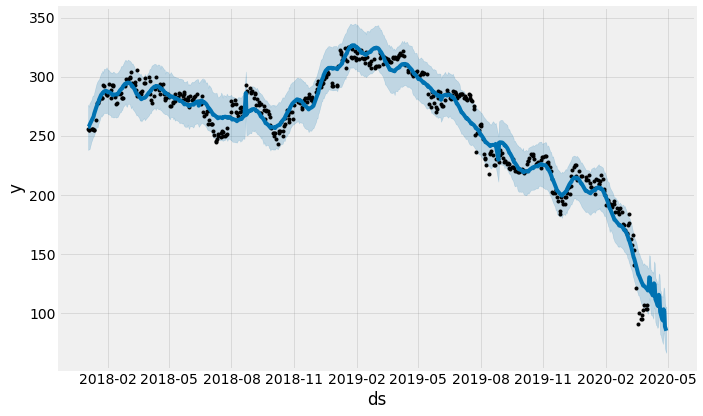

In [9]:
fig1 = m.plot(forecast, uncertainty=True)

(737456.0, 737545.0)

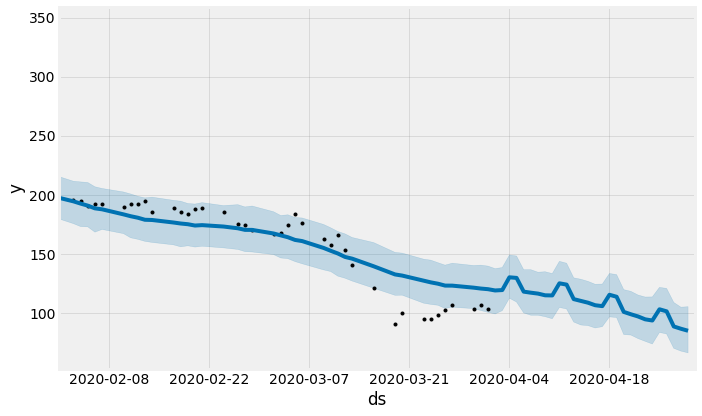

In [10]:
from fastquant import datestring_to_datetime

fig1 = m.plot(forecast)
#zoom
fig1.axes[0].set_xlim(datestring_to_datetime("2020-02-01"),
                      datestring_to_datetime("2020-04-30")
                     )

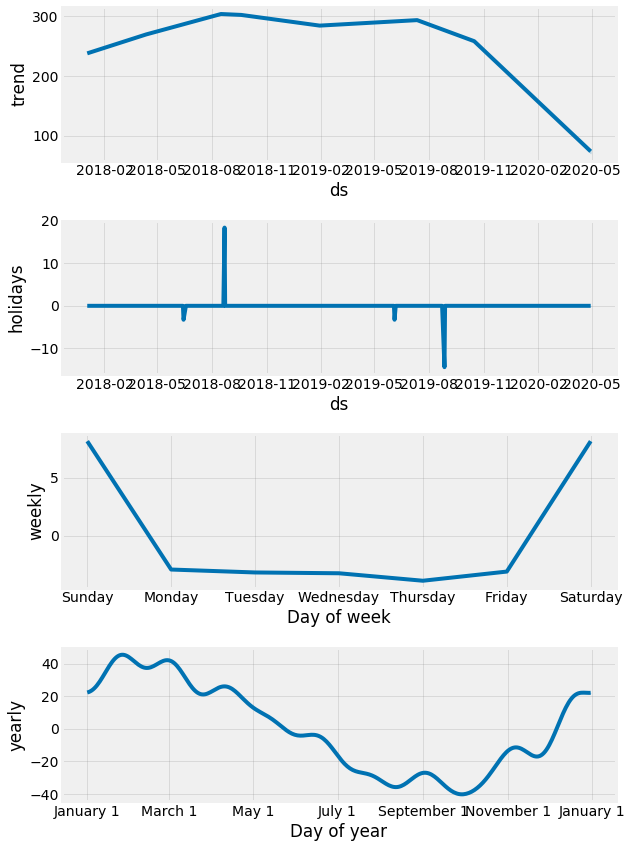

In [11]:
fig2 = m.plot_components(forecast)

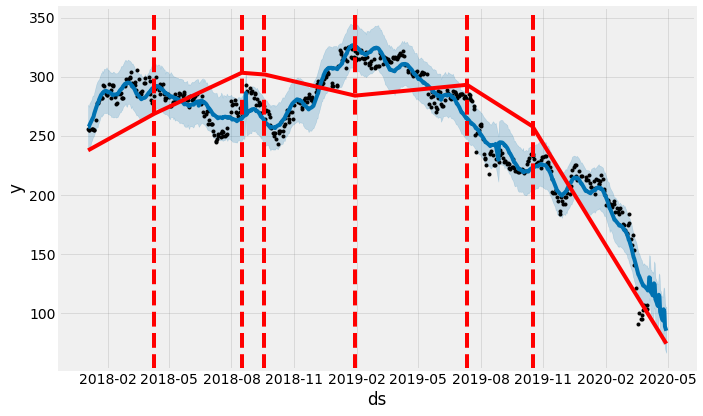

In [12]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Pulling JFC stock data...


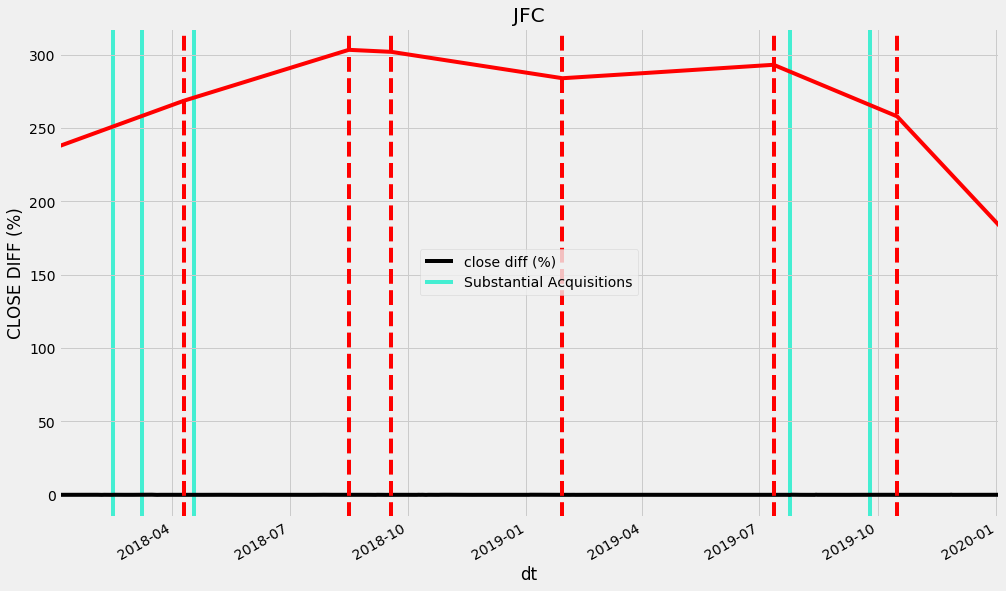

In [13]:
fig = psed.plot_disclosures(disclosure_type="substantial acquisitions")
cp = add_changepoints_to_plot(fig.gca(), m, forecast)

## pm-prophet (under development)
* https://github.com/luke14free/pm-prophet#installing-pm-prophet